# Steps_Counts and Calore_Intake Prediction
### Model for SheBuilds Hackathon


## Importing Libraries



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt #to visualize data
import seaborn as sns #to visualize data

from sklearn.preprocessing import StandardScaler #to scale the data
from sklearn.model_selection import train_test_split #to spilt the data into test and train sets

from sklearn.linear_model import LinearRegression #linear regression library
from sklearn.tree import DecisionTreeRegressor #decision tree library
from sklearn.multioutput import MultiOutputRegressor #multioutput library
from sklearn.multioutput import RegressorChain #multioutput library

from sklearn import ensemble
from sklearn import linear_model
from sklearn import metrics

## Importing the Dataset

In [2]:
data = pd.read_excel('/content/weight_food_stepcount.xlsx') #reading the xlsx file
data.head()

,ID,Date,Gender,Height,Weight,Steps count,Calories intake
0,NN1,2020-06-04,M,176.0,81.640,3160.56,1183.0
1,NN1,2020-06-05,M,176.0,82.056,8757.84,1628.0
2,NN1,2020-06-06,M,176.0,81.536,3051.36,1494.0
3,NN1,2020-06-07,M,176.0,81.224,16567.20,1212.0
4,NN1,2020-06-08,M,176.0,82.368,8061.04,1230.0


## Data Cleaning

In [3]:
data.isnull().sum()

ID                 0
Date               0
Gender             2
Height             2
Weight             7
Steps count        8
Calories intake    8
dtype: int64

In [4]:
data = data.dropna() #drops the null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 258
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               251 non-null    object        
 1   Date             251 non-null    datetime64[ns]
 2   Gender           251 non-null    object        
 3   Height           251 non-null    float64       
 4   Weight           251 non-null    float64       
 5   Steps count      251 non-null    float64       
 6   Calories intake  251 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 15.7+ KB


In [6]:
data.Gender.unique()

array(['M'], dtype=object)

this shows that there is only male data in the dataset

In [7]:
data = data.drop(['ID', 'Date', 'Gender'], axis=1) 
#dropping unnecessary columns
#droppped the gender column as there is no data for females

In [8]:
data.describe()

,Height,Weight,Steps count,Calories intake
count,251.000000,251.000000,251.000000,251.000000
mean,174.637450,78.692291,7790.851315,2781.027888
std,2.518736,2.363638,4094.357002,1279.793400
min,170.000000,72.850440,1226.160000,670.000000
25%,176.000000,78.072255,3921.840000,2000.000000
50%,176.000000,79.252992,8187.920000,2465.000000
75%,176.000000,80.288000,8824.920000,3100.000000
max,176.000000,82.680000,21775.520000,9150.000000


In [9]:
a, b = data.shape
print("Number of rows:", a)
print("Number of columns:", b)

Number of rows: 251
Number of columns: 4


## Machine Learning Models


### MultiOutputRegressor

In [10]:
data.head()

,Height,Weight,Steps count,Calories intake
0,176.0,81.640,3160.56,1183.0
1,176.0,82.056,8757.84,1628.0
2,176.0,81.536,3051.36,1494.0
3,176.0,81.224,16567.20,1212.0
4,176.0,82.368,8061.04,1230.0


In [29]:
x = data[['Height', 'Weight']] #independent varaibles
y = data[['Steps count', 'Calories intake']] #dependent variables

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y.astype('float32')) #splitting the dataset into training and testing data

base_reg = linear_model.Ridge()
model = RegressorChain(base_reg, order='random')
model.fit(x_train, y_train) #fitting the values into the model

y_pred = model.predict(x_test) #predicting the values for the test set

In [30]:
#calculating the accuracy of the model on the training and testing data
print('RSquared value on train: {:.4f}'.format(model.score(x_train, y_train)))
print('RSquared value on test: {:.4f}'.format(model.score(x_test, y_test)))

RSquared value on train: 0.0576
RSquared value on test: 0.1016


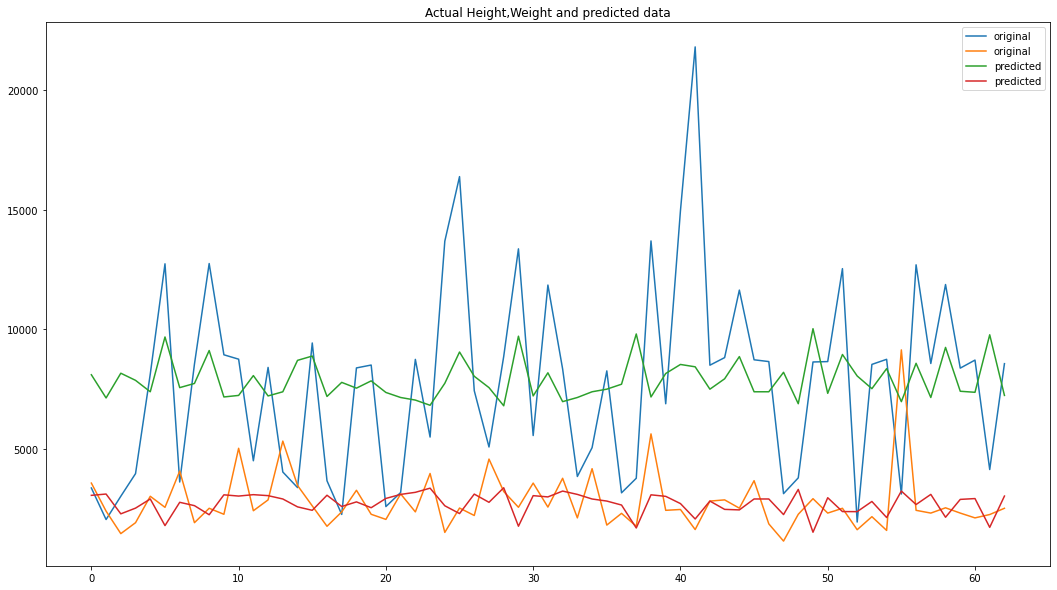

In [31]:
#visual representation of the accuracy of the model
plt.figure(figsize=(18,10))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Actual Height,Weight and predicted data")
plt.legend()
plt.show()

### 2 Linear Regression Models

In [15]:
data.head()

,Height,Weight,Steps count,Calories intake
0,176.0,81.640,3160.56,1183.0
1,176.0,82.056,8757.84,1628.0
2,176.0,81.536,3051.36,1494.0
3,176.0,81.224,16567.20,1212.0
4,176.0,82.368,8061.04,1230.0


In [16]:
#diving the dataframe into independent and dependent columns
X = data[['Height', 'Weight']] #independent variables
Y = data[['Steps count']] #dependent variable
Z = data[['Calories intake']] #dependent variable

In [17]:
#splitting the data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=70)
X_train, X_test, Z_train, Z_test = train_test_split(X, Z, train_size=0.7, random_state=70)

In [18]:
scaler = StandardScaler() #used the sklearn.preprocessing.StandardScaler to scale the train dataset
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns) #scaling the train dataset
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) #scaling the test dataset

In [19]:
#using Decision 
#the fit method is used to fit the model to the dataset. This will ingest the data and learn from it
model1 = DecisionTreeRegressor()
model1.fit(X_train, Y_train)
model2 = DecisionTreeRegressor()
model2.fit(X_train, Z_train)

DecisionTreeRegressor()

In [20]:
#predicting on test
test_pred1=model1.predict(X_test)
test_pred2=model2.predict(X_test)

In [21]:
#accuracy score of model for steps count
print('RSquared value on train: {:.4f}'.format(model1.score(X_train, Y_train)))
print('RSquared value on test: {:.4f}'.format(model1.score(X_test, Y_test)))

RSquared value on train: 0.7503
RSquared value on test: -0.8288


In [22]:
#accuracy score of model for calories intake
print('RSquared value on train: {:.4f}'.format(model2.score(X_train, Z_train)))
print('RSquared value on test: {:.4f}'.format(model2.score(X_test, Z_test)))

RSquared value on train: 0.6636
RSquared value on test: -0.9387


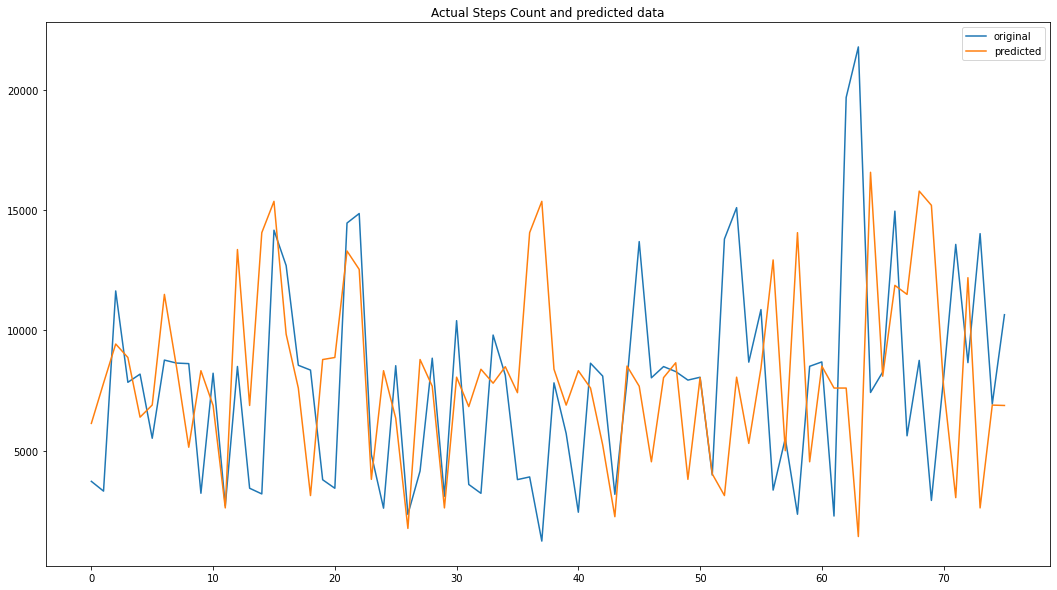

In [23]:
#plotting te data to visually show the performance of our model
plt.figure(figsize=(18,10))
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, test_pred1, label="predicted")
plt.title("Actual Steps Count and predicted data")
plt.legend()
plt.show()

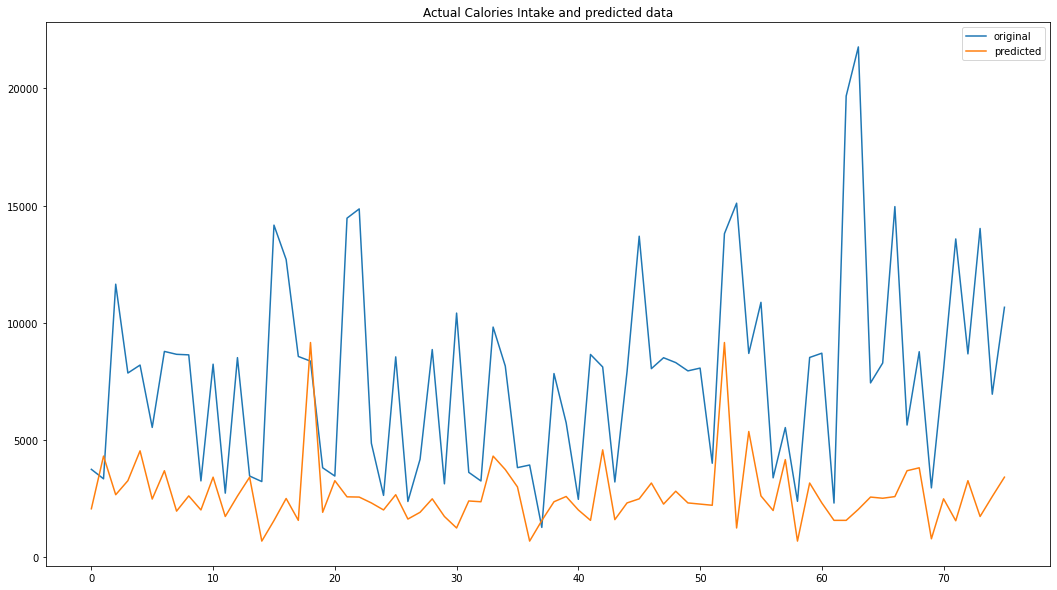

In [24]:
#plotting te data to visually show the performance of our model
plt.figure(figsize=(18,10))
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, test_pred2, label="predicted")
plt.title("Actual Calories Intake and predicted data")
plt.legend()
plt.show()

## Packaging the model

In [33]:
#using pickle to ship the model. The pickle file will be further used by the web team for deployment
import pickle
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))